In [1]:
import numpy as np
import pandas as pd
import find_split as fs
import evaluation as ev
import matplotlib.pyplot as plt
from trees import binarySearchTree

In [2]:
#using the noisy dataset so we can see the effects of pruning
data = np.loadtxt('noisy_dataset.txt')
print(data[:5])

[[-59. -53. -51. -54. -45. -79. -87.   4.]
 [-66. -53. -59. -62. -69. -81. -79.   1.]
 [-41. -57. -63. -40. -73. -66. -65.   2.]
 [-62. -58. -52. -63. -50. -87. -88.   4.]
 [-63. -58. -64. -67. -74. -87. -87.   4.]]


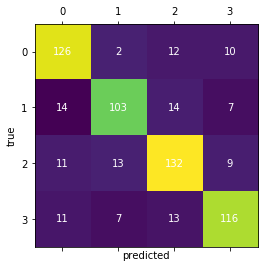

[[126, 14, 11, 11], [2, 103, 13, 7], [12, 14, 132, 13], [10, 7, 9, 116]]
avg recall precision 0.7976522526974714 0.7976522526974714
avg classification rate 0.795
f1 0.7976522526974715


In [3]:
#first, create a train and test set 
#evaluate on the test set to see pre-pruning results

data2=data.copy()
#shuffle data
np.random.shuffle(data2)
split=0.7
train=data2[:int(len(data2)*split)]
test=data2[int(len(data2)*split):]

model=binarySearchTree(train)
y_pred=model.predict(test[:,:-1])
#evaluate
cm=ev.confusion_matrix(test[:,-1],y_pred,plot=True)
print(cm)
r=ev.avg_recall_precision(cm)
print('avg recall precision',r[0],r[1])
print('avg classification rate',ev.avg_classification_rate(cm))
print('f1',ev.f1_score(r[0],r[1]))

In [4]:
#now prune the model
#use print_path=False to not print
model.prune_tree(data2,print_path=True)

set 1 to prune at path ['parent', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'r', 'l', 'l', 'l', 'r']
current f1: 0.9385820070005896
new f1 score: 0.9390993970552032
pruned 1!
set 1 to prune at path ['parent', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'r', 'l', 'r', 'l', 'l']
current f1: 0.9390993970552032
new f1 score: 0.9396343683252644
pruned 1!
set 1 to prune at path ['parent', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'r', 'l', 'r', 'l', 'r', 'l']
current f1: 0.9396343683252644
new f1 score: 0.9391313502166125
did not prune
set 1 to prune at path ['parent', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'r', 'r', 'l', 'r']
current f1: 0.9396343683252644
new f1 score: 0.9391489314320605
did not prune
set 1 to prune at path ['parent', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'r', 'r', 'r', 'l', 'r', 'l']
current f1: 0.9396343683252644
new f1 score: 0.9391323602931358
did not prune
set 1 to prune at path ['parent', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'r', 'l', 'l']
current f1: 0.9396343683252644
new

new f1 score: 0.9396559262442066
did not prune
set 1 to prune at path ['parent', 'r', 'r', 'r', 'l', 'r', 'l', 'r', 'l', 'l', 'l', 'l', 'l']
current f1: 0.9406619624615103
new f1 score: 0.9401589443528586
did not prune
set 1 to prune at path ['parent', 'r', 'r', 'r', 'r', 'l', 'l', 'r', 'l', 'l']
current f1: 0.9406619624615103
new f1 score: 0.9401765255683064
did not prune
set 1 to prune at path ['parent', 'r', 'r', 'r', 'r', 'l', 'l', 'r', 'l', 'r', 'l']
current f1: 0.9406619624615103
new f1 score: 0.9401765255683064
did not prune
set 1 to prune at path ['parent', 'r', 'r', 'r', 'r', 'l', 'l', 'r', 'l', 'r', 'r', 'r', 'r']
current f1: 0.9406619624615103
new f1 score: 0.9401589443528586
did not prune
set 1 to prune at path ['parent', 'r', 'r', 'r', 'r', 'l', 'l', 'r', 'r', 'r']
current f1: 0.9406619624615103
new f1 score: 0.9406795436769586
pruned 1!
set 1 to prune at path ['parent', 'r', 'r', 'r', 'r', 'l', 'r', 'l', 'l', 'l', 'r', 'r', 'r', 'r', 'r']
current f1: 0.9406795436769586
ne

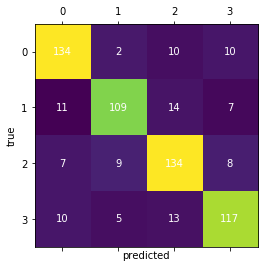

[[134, 11, 7, 10], [2, 109, 9, 5], [10, 14, 134, 13], [10, 7, 8, 117]]
avg recall precision 0.8266824716982859 0.8266824716982859
avg classification rate 0.8233333333333334
f1 0.8266824716982859


In [5]:
#now use the pruned model on the test set again

y_pred=model.predict(test[:,:-1])
#evaluate
cm=ev.confusion_matrix(test[:,-1],y_pred,plot=True)
print(cm)
r=ev.avg_recall_precision(cm)
print('avg recall precision',r[0],r[1])
print('avg classification rate',ev.avg_classification_rate(cm))
print('f1',ev.f1_score(r[0],r[1]))

In [6]:
#as can be seen above, f1 score on validation set improved after pruning! 